<h2><a href="https://leetcode.com/problems/number-of-submatrices-that-sum-to-target">1074. Number of Submatrices That Sum to Target</a></h2><h3>Hard</h3><hr><p>Given a <code>matrix</code>&nbsp;and a <code>target</code>, return the number of non-empty submatrices that sum to <font face="monospace">target</font>.</p>

<p>A submatrix <code>x1, y1, x2, y2</code> is the set of all cells <code>matrix[x][y]</code> with <code>x1 &lt;= x &lt;= x2</code> and <code>y1 &lt;= y &lt;= y2</code>.</p>

<p>Two submatrices <code>(x1, y1, x2, y2)</code> and <code>(x1&#39;, y1&#39;, x2&#39;, y2&#39;)</code> are different if they have some coordinate&nbsp;that is different: for example, if <code>x1 != x1&#39;</code>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/09/02/mate1.jpg" style="width: 242px; height: 242px;" />
<pre>
<strong>Input:</strong> matrix = [[0,1,0],[1,1,1],[0,1,0]], target = 0
<strong>Output:</strong> 4
<strong>Explanation:</strong> The four 1x1 submatrices that only contain 0.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> matrix = [[1,-1],[-1,1]], target = 0
<strong>Output:</strong> 5
<strong>Explanation:</strong> The two 1x2 submatrices, plus the two 2x1 submatrices, plus the 2x2 submatrix.
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> matrix = [[904]], target = 0
<strong>Output:</strong> 0
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= matrix.length &lt;= 100</code></li>
	<li><code>1 &lt;= matrix[0].length &lt;= 100</code></li>
	<li><code>-1000 &lt;= matrix[i][j] &lt;= 1000</code></li>
	<li><code>-10^8 &lt;= target &lt;= 10^8</code></li>
</ul>


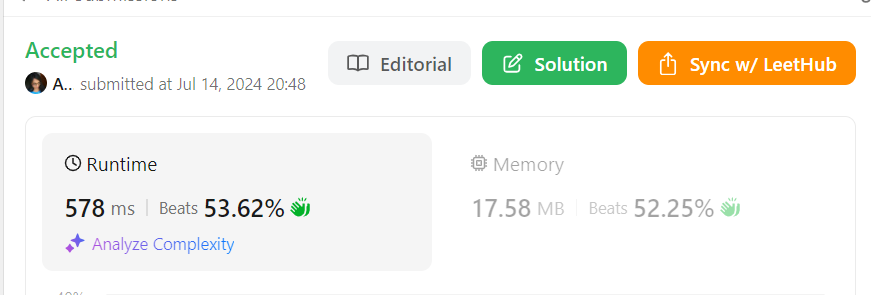

In [2]:
from typing import List

class Solution:
    def numSubmatrixSumTarget(self, matrix: List[List[int]], target: int) -> int:
        rows, cols = len(matrix), len(matrix[0])
        ps = [[0]* cols for _ in range(rows)]

        for i in range(rows):
            for j in range(cols):
                x = ps[i-1][j] if i > 0 else 0
                y = ps[i][j-1] if j > 0 else 0
                prev = ps[i-1][j-1] if (i > 0 and j > 0) else 0
                ps[i][j] = x + y - prev + matrix[i][j]


        count = 0
        for r1 in range(rows):              # This peice of code is to check if any of the submatrices' sum equals target
            for r2 in range(r1, rows):
                sums = defaultdict(int)
                sums[0] = 1
                for c in range(cols):
                    # Sum of submatrix (r1, 1) to (r2, c)
                    curr_sum = ps[r2][c] - (ps[r1-1][c] if r1 > 0 else 0 )

                    # If (curr_sum - target) exists in hashmap, it means there is a submatrix ending at column c that sums to target
                    count += sums[curr_sum - target]
                    sums[curr_sum] += 1
        return count